In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf


In [8]:
start = '2020-01-01'
end = '2024-12-31'

df = yf.download("AAPL", start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620842,72.681289,71.373218,71.627092,135480400
2020-01-03,71.914795,72.676423,71.689935,71.847095,146322800
2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200
2020-01-07,72.146927,72.753808,71.926900,72.497514,108872000
2020-01-08,73.307487,73.609722,71.849510,71.849510,132079200


In [9]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800
2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700
2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100
2024-12-27,254.974930,258.077462,252.451019,257.209530,42355300
2024-12-30,251.593094,252.889969,250.146586,251.623020,35557500


In [10]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2020-01-02,72.620842,72.681289,71.373218,71.627092,135480400
1,2020-01-03,71.914795,72.676423,71.689935,71.847095,146322800
2,2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200
3,2020-01-07,72.146927,72.753808,71.926900,72.497514,108872000
4,2020-01-08,73.307487,73.609722,71.849510,71.849510,132079200


In [11]:
df = df.drop(["Date"], axis =1)
df.head()

/tmp/ipykernel_40/2022630174.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(["Date"], axis =1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,72.620842,72.681289,71.373218,71.627092,135480400
1,71.914795,72.676423,71.689935,71.847095,146322800
2,72.487846,72.526533,70.783248,71.034709,118387200
3,72.146927,72.753808,71.926900,72.497514,108872000
4,73.307487,73.609722,71.849510,71.849510,132079200


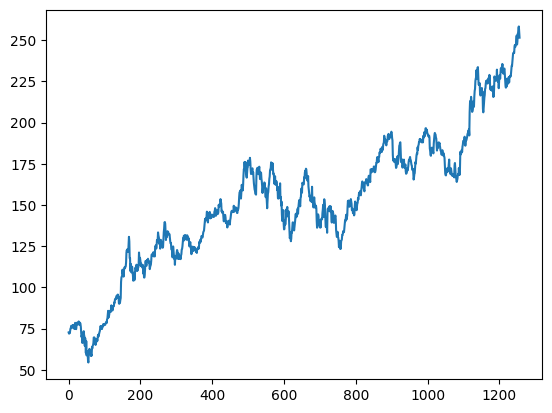

In [12]:
plt.plot(df.Close)

In [13]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1252,228.669740
1253,229.057161
1254,229.558169
1255,230.045265


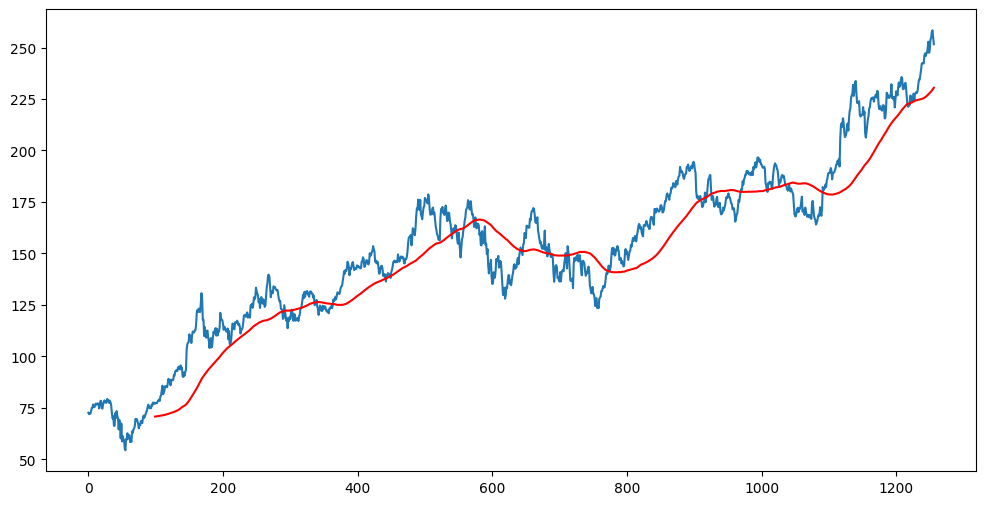

In [14]:
plt.figure(figsize =(12 ,6))
plt.plot(df.Close)
plt.plot(ma100,"r")

In [15]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1252,210.476669
1253,210.905998
1254,211.337031
1255,211.761392


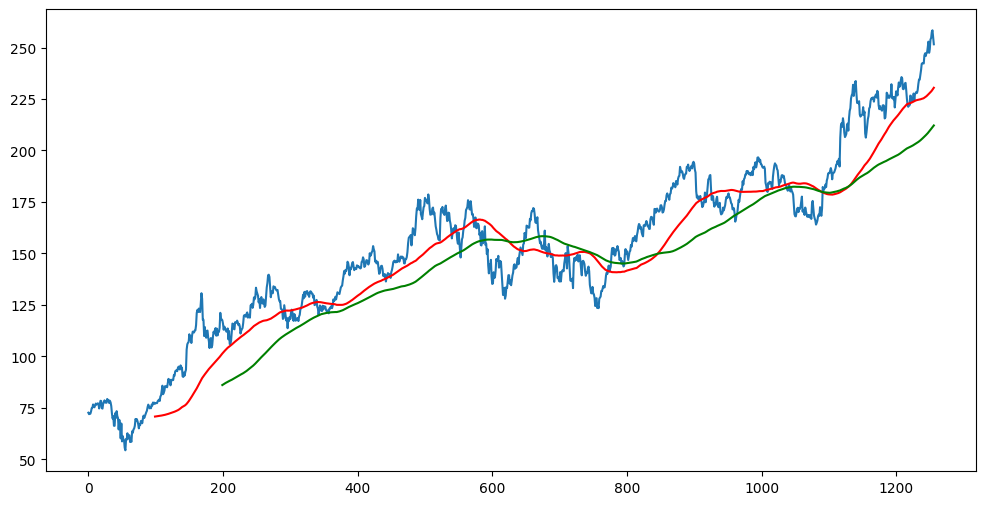

In [16]:
plt.figure(figsize =(12 ,6))
plt.plot(df.Close)
plt.plot(ma100,"r")
plt.plot(ma200,"g")

In [17]:
df.shape

(1257, 5)

In [18]:
#Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0: int(len(df)*0.78)])
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])



print(data_training.shape)

print(data_testing.shape)

(980, 1)
(378, 1)


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.13018654],
       [0.12514781],
       [0.12923741],
       [0.12680443],
       [0.13508681],
       [0.14619953],
       [0.14740723],
       [0.1588474 ],
       [0.15146226],
       [0.14914998],
       [0.15587969],
       [0.16190158],
       [0.15817448],
       [0.16012436],
       [0.16276435],
       [0.16117704],
       [0.14502603],
       [0.1601071 ],
       [0.1715819 ],
       [0.17077085],
       [0.14599241],
       [0.1445256 ],
       [0.16210869],
       [0.166595  ],
       [0.17308296],
       [0.16545547],
       [0.16808446],
       [0.16472898],
       [0.1778568 ],
       [0.17382666],
       [0.17396517],
       [0.16367395],
       [0.17166477],
       [0.1659223 ],
       [0.15338262],
       [0.12766323],
       [0.11019403],
       [0.11809844],
       [0.08501089],
       [0.08473408],
       [0.12875294],
       [0.11233861],
       [0.13555026],
       [0.11856544],
       [0.11183731],
       [0.07229818],
       [0.10545482],
       [0.088

In [21]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train , y_train =np.array(x_train) , np.array(y_train)

In [22]:
from keras. layers import Dense, Dropout ,LSTM

from keras.models import Sequential

2025-06-12 13:57:32.303335: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-12 13:57:32.391385: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-12 13:57:32.468917: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749736652.550133      40 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749736652.573507      40 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749736652.726222      40 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [23]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout (0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout (0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout (0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout (0.5))

model.add(Dense(units=1))

2025-06-12 13:57:39.487370: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='adam', loss ='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - loss: 0.2566
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0248
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0163
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0155
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - loss: 0.0153
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0153
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0145
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0143
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0167
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0122
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0115
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0124
Epoch 13/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0126
Epoch 14/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0103
Epoch 15/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - lo

In [28]:
model.save("../models/lstm_model.h5")

In [30]:
past_100_days = data_training.tail (100)

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df.head()

Ticker,AAPL
0,190.552155
1,189.433319
2,189.908600
3,188.789764
4,186.740311


In [31]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.2812106 ],
       [0.26935692],
       [0.27439236],
       [0.26253868],
       [0.24082542],
       [0.2352662 ],
       [0.25299337],
       [0.26107015],
       [0.2626436 ],
       [0.29725956],
       [0.29453217],
       [0.30890308],
       [0.28823836],
       [0.27575581],
       [0.28425243],
       [0.29337839],
       [0.30260927],
       [0.28918262],
       [0.31656067],
       [0.32306415],
       [0.31425279],
       [0.2824693 ],
       [0.26767887],
       [0.17138398],
       [0.13844671],
       [0.1484117 ],
       [0.13152323],
       [0.12921567],
       [0.12984583],
       [0.14738725],
       [0.12627456],
       [0.11703139],
       [0.09003665],
       [0.09518363],
       [0.1093633 ],
       [0.12396377],
       [0.16482343],
       [0.115036  ],
       [0.138459  ],
       [0.15505518],
       [0.19633484],
       [0.23341339],
       [0.23572419],
       [0.25242529],
       [0.25494592],
       [0.18362532],
       [0.12743028],
       [0.133

In [32]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

x_test , y_test =np.array(x_test) , np.array(y_test)

In [33]:
#predication making
y_predication = model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


In [34]:
scaler.scale_

array([0.01059466])

In [35]:
scaling_factor = 1/0.01399972
y_test = y_test*scaling_factor
y_predication=y_predication*scaling_factor

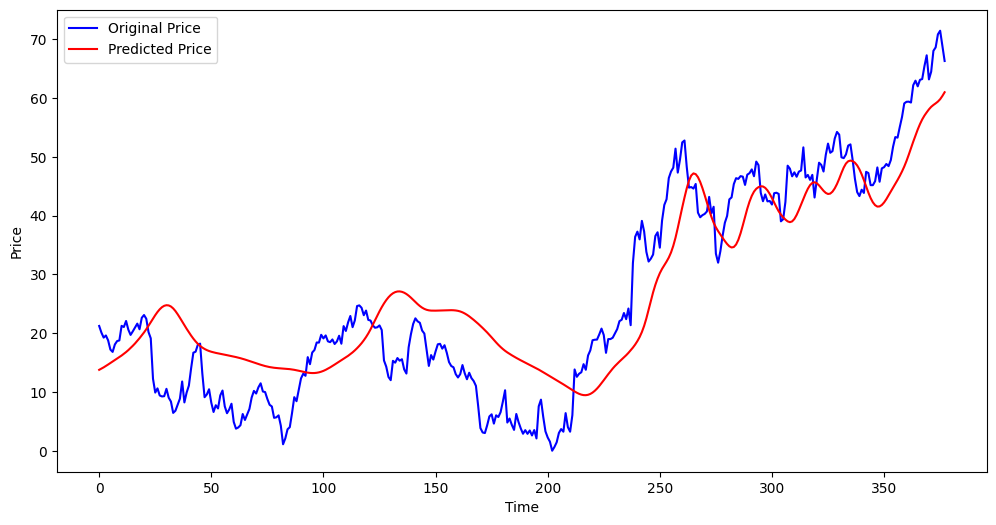

In [36]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predication,'r', label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()